<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Frequentist Hypothesis Testing


---

## Learning Objectives
### Core
- Understand the fundamental concepts of frequentist hypothesis testing
- Understand the difference between the null and alternative hypothesis
- Understand the t-statistic, p-value, and t-test
- Calculate the t-statistic and p-value by hand
- Learn about other frequently used statistical tests

### Target
- Visually represent the t-test and p-value using the t-distribution

### Stretch
- Understand how the t-test and frequentist hypothesis testing relate to the number of observations, the means and the standard deviations of each group

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Load-some-data" data-toc-modified-id="Load-some-data-3">Load some data</a></span></li><li><span><a href="#One-sample-t-test" data-toc-modified-id="One-sample-t-test-4">One sample t-test</a></span></li><li><span><a href="#Interpreting-the-p-value" data-toc-modified-id="Interpreting-the-p-value-5">Interpreting the p-value</a></span></li><li><span><a href="#Two-sided-versus-one-sided-test" data-toc-modified-id="Two-sided-versus-one-sided-test-6">Two-sided versus one-sided test</a></span></li><li><span><a href="#Comparing-means-of-two-groups" data-toc-modified-id="Comparing-means-of-two-groups-7">Comparing means of two groups</a></span></li><li><span><a href="#Comparing-means-of-more-than-two-groups" data-toc-modified-id="Comparing-means-of-more-than-two-groups-8">Comparing means of more than two groups</a></span></li><li><span><a href="#Chi-squared-test" data-toc-modified-id="Chi-squared-test-9">Chi-squared test</a></span></li><li><span><a href="#Normality-test" data-toc-modified-id="Normality-test-10">Normality test</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11">Summary</a></span><ul class="toc-item"><li><span><a href="#One-sample-t-test" data-toc-modified-id="One-sample-t-test-11.1">One-sample t-test</a></span></li><li><span><a href="#Two-sample-t-test" data-toc-modified-id="Two-sample-t-test-11.2">Two-sample t-test</a></span></li><li><span><a href="#One-way-F-test" data-toc-modified-id="One-way-F-test-11.3">One-way F-test</a></span></li><li><span><a href="#Chi2-test" data-toc-modified-id="Chi2-test-11.4">Chi2-test</a></span></li><li><span><a href="#Normality-test" data-toc-modified-id="Normality-test-11.5">Normality test</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-12">Conclusions</a></span><ul class="toc-item"><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-12.1">Additional resources</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import scipy.stats as stats

## Introduction

Hypothesis tests are frequently used in so-called frequentist statistics. Their purpose is to summarize through a single number if an effect measured on a data sample can be considered as statistically significant or is rather likely to be observed merely by chance.

**Example:** General surveys say that the Earth's population has a mean height of 170 cm. I measure the heights of the students in a GA class and get an average height of 172 cm. Given the size of the class and the natural fluctuations in heights, can this deviation from the population mean be attributed to chance or are GA students really taller?

The answer can be given through a formal procedure.

We formulate two mutually exclusive hypotheses:

- The null hypothesis (often denoted as H0)
- The alternative hypothesis (often denoted as H1)

**Example:**

In the case of the height measurements we might say:
- The null hypothesis is that the mean height of GA students is just the same as the one of the rest of the world.
- The alternative hypothesis is that the mean height of GA students really is different from the rest of the world.

The next step is to think how likely it would be to observe the measurement under the null hypothesis. For that purpose, we have to know how likely different measurement results are in the first place, that means we have to know the probability distribution for the measured values. Since usually we don't know, at this point we have to make assumptions.

**Example:** If we observe a difference of 2 cm, we would say
- we accept the null hypothesis if the observed deviation appears to be likely to be a mere statistical fluctuation
- we reject the null hypothesis if we think that the null hypothesis is rather unlikely


**What means unlikely here?**

Probabilities are about observing the data given the statistics, that is observing the sample with the 2 cm observed difference from the hypothesized mean value.


## Load some data

To illustrate how this works in practice, we load the car statistics dataset.

In [3]:
df = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## One sample t-test

We see that the mean `mpg` has a value of 23.51. What if you heard or read that in truth cars from that period had a mean `mpg` of 25? Is our sample particular, neglecting some cars, or is that within natural fluctuation?

We can use the one-sample t-test to assess this. Let's first formulate our hypotheses:

- H0: The mean `mpg` of cars is 25
- H1: The mean `mpg` of cars is not 25

> Note: We are just asking for difference, not for larger or smaller.

- What we measure is a smaller `mpg`:

$$
23.51 - 25 = -1.49
$$

This number is unit dependent. For that reason we should standardize it to get rid of units and also to compare it against natural variability. Additionally we want to take the number of observations into account, so we divide by the standard error rather than the standard deviation to obtain the so-called t-statistics:

$$
t = \frac{\mu_{\rm observed}-\mu_{\rm hypothesized}}{s/\sqrt{n}} 
\approx -\frac{1.49}{7.826/\sqrt{397}} 
\approx -3.779
$$

This is called a t-statistics because it follows a t-distribution. This can be assumed relying on the central limit theorem as long as our sample is large enough (more than 30 observations).

In [5]:
(df.mpg.mean() - 25) / stats.sem(df.mpg)

-3.7786661408732005

We can calculate the same using a scipy function. It returns the calculated statistic and a p-value. The p-value expresses how likely it would be to observe a t-statistic value either smaller than the observed one or larger than the one with the sign reversed.

In [6]:
ttest_result = stats.ttest_1samp(df.mpg, 25)
ttest_result

Ttest_1sampResult(statistic=-3.7786661408732183, pvalue=0.0001819102852282707)

The p-value can be calculated using the cumulative distribution function. Note that we multiply by 2 to account for deviations to either side of the hypothesized value.

In [7]:
stats.t.cdf(ttest_result.statistic, len(df)-1)*2

0.0001819102852282707

We can depict the meaning of the p-value with the following plot. It shows the t-distribution picking up our observed number of observations by setting the "degrees of freedom" to `len(df)-1`.

We color the surface beyond the positive or negative absolute value of the observed statistics. The combined size of these surfaces gives the p-value. 

In [8]:
def plot_pvalue(t_stats, dof=1):
    t_dist = stats.t(dof)
    x_vals = np.linspace(-4, 4, 1000)
    y_vals = t_dist.pdf(x_vals)
    fig, ax = plt.subplots()
    ax.plot(x_vals, y_vals, c='b', lw=4)
    ax.fill_between(x_vals, np.zeros_like(x_vals), y_vals, where=(
        x_vals < -abs(t_stats)) | (x_vals > abs(t_stats)), color='r')
    ax.set_title(
        f't_statistics: {round(t_stats, 3)}\n p-value: {round(t_dist.sf(abs(t_stats))*2, 3)}')
    return ax

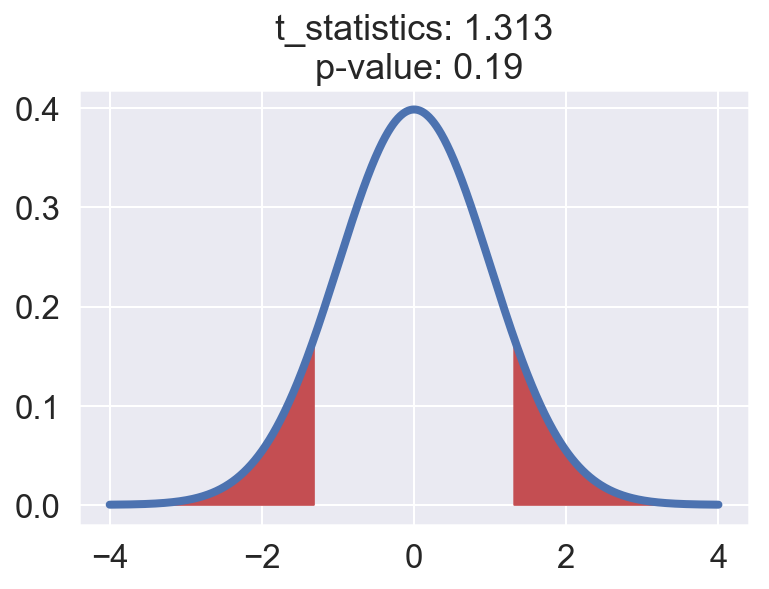

In [9]:
ax = plot_pvalue(stats.ttest_1samp(df.mpg, 23).statistic, dof=len(df)-1)

## Interpreting the p-value

- A small p-value means observing a sample with the measured sample statistic is rather unlikely. We would therefore reject H0 in favor of H1.
- A large p-value means observing a sample with the measured sample statistic is rather likely. We would therefore accept H0.
- The p-value is simply observed, but what to do with it depends on the analyst who would fix a p-value threshold before doing the experiment, e.g. 0.05 or 0.01. H0 is rejected whenever the p-value is below the predefined threshold. It is crucial to set the threshold before the experiment.
- A threshold of 0.05 means a 1 in 20 chance. This is not really low. Just imagine repeating the same experiment twenty times. You might be rejecting the null hypothesis just by pure chance.

Rejection/acceptance sounds drastic, but keep in mind that you might take decisions based on the result of a hypothesis test, e.g. understanding if a drug has the desired effect or if a chemical provokes cancer. The test never reveals which of the hypotheses is really true. It merely says if the data gives sufficient support to the null hypothesis under the assumptions that you are making.

## Two-sided versus one-sided test

Above we were just asking for equality or difference in H0 and H1. Often we will be interested in specifying to which side the deviation is significant. The hypothesis would be:

- H0: The mean is larger than or equal to 25.
- H1: The mean is smaller than 25.

The test would proceed in the same way, but the p-value would be half as large.

In [10]:
stats.ttest_1samp(df.mpg, 25).pvalue / 2

9.095514261413534e-05

## Comparing means of two groups

In the data we have cars from three different origins. We could ask if the mean `mpg` is statistically significantly different in America and Europe and Asia.

Indeed, the means are rather different across the groups, the standard deviations rather similar and the counts quite different.

In [11]:
df.groupby('origin')['mpg'].agg(['mean', 'std', 'count'])

,mean,std,count
origin,,,
1,20.071774,6.413145,248
2,27.891429,6.723930,70
3,30.450633,6.090048,79


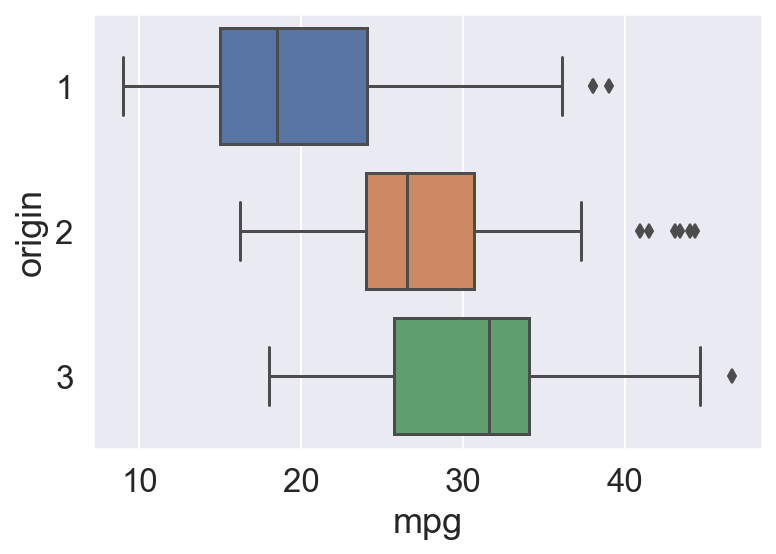

In [12]:
sns.boxplot(x='mpg', y='origin', data=df, orient='h')
plt.show()

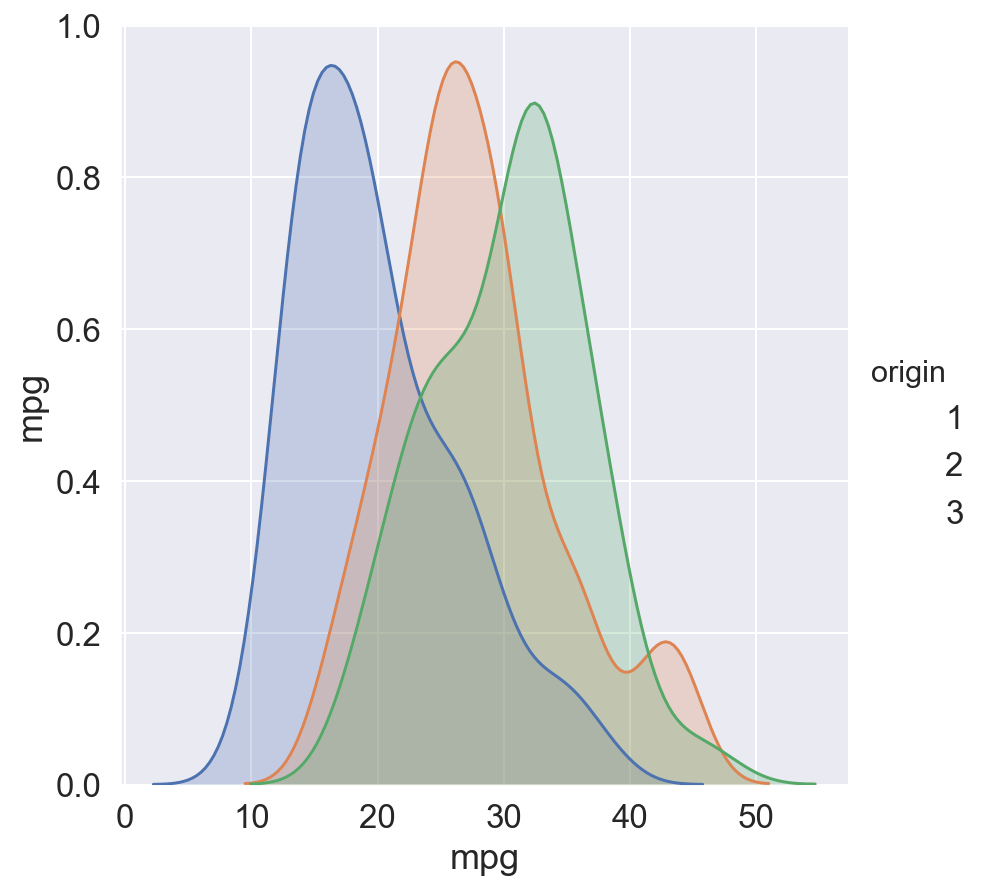

In [13]:
sns.pairplot(data=df, x_vars=['mpg'], y_vars=['mpg'], hue='origin', height=6)
plt.show()

Also here we can use a t-test to compare the group means pairwise taking into account the variability of the data and the number of observations of each group. The default t-test will assess how likely it is to observe a certain difference of sample means between two groups even though the standard deviations are assumed to be the same in each group.

In [14]:
# for one pair
stats.ttest_ind(df.mpg[df.origin == 1], df.mpg[df.origin == 2])

Ttest_indResult(statistic=-8.912944578256594, pvalue=4.043177506900016e-17)

In [15]:
from itertools import combinations

In [16]:
list(combinations([1, 2, 3], 2))

[(1, 2), (1, 3), (2, 3)]

In [17]:
# iterating over all possible pairs
for comb in combinations([1, 2, 3], 2):
    print(comb, stats.ttest_ind(
        df.mpg[df.origin == comb[0]], df.mpg[df.origin == comb[1]]))

(1, 2) Ttest_indResult(statistic=-8.912944578256594, pvalue=4.043177506900016e-17)
(1, 3) Ttest_indResult(statistic=-12.67722648020723, pvalue=3.370227003938695e-30)
(2, 3) Ttest_indResult(statistic=-2.4378433467144993, pvalue=0.015968231401682957)


**What does this calculate?**

When comparing the difference between groups, we can calculate the two-sample t-statistic as

$$t = \frac{\bar{x} - \bar{y}}{\sqrt {s^2 \left(\frac{1}{n_x} + \frac{1}{n_y}\right)}}$$

where $\bar{x}$ is the mean of the first group sample measurements and $\bar{y}$ is the mean of the second group sample measurements.

$n_x$ and $n_y$ are the number of observations in each group. 

The sample variance as an estimate of the population variance is calculated as the weighted average of the variances of each sample

$$ s^2 = \frac{\sum_{i=1}^{n_x} (x_i - \bar{x})^2 + \sum_{j=1}^{n_y} (y_j - \bar{y})^2}{ n_x + n_y -2} $$

which combines the variance of the two group's measurements into a single, pooled metric. 


In [18]:
def get_t_stats(x, y):
    n_x = len(x)
    n_y = len(y)
    dof = n_x + n_y - 2
    mean_diff = x.mean() - y.mean()
    var_pooled = (np.sum(np.square(x-x.mean())) +
                  np.sum(np.square(y-y.mean()))) / dof
    sem = (var_pooled * (1 / n_x + 1 / n_y))**0.5
    t_stat = mean_diff/sem
    p_value = stats.t.cdf(-abs(t_stat), dof)*2
    return t_stat, p_value

In [19]:
get_t_stats(df.mpg[df.origin == 1], df.mpg[df.origin == 2])

(-8.912944578256607, 4.0431775068996664e-17)

In [20]:
# this agrees with scipy
for comb in combinations([1, 2, 3], 2):
    print(get_t_stats(df.mpg[df.origin == comb[0]],
                      df.mpg[df.origin == comb[1]]))

(-8.912944578256607, 4.0431775068996664e-17)
(-12.67722648020723, 3.370227003938695e-30)
(-2.437843346714489, 0.015968231401683384)


For this dataset, assuming equal variances in each group seems reasonable, but frequently this won't be the case. Then Welch's generalized version of the t-test is preferred. Just set `equal_var=False`.

In [21]:
for comb in combinations([1, 2, 3], 2):
    print(comb, stats.ttest_ind(df.mpg[df.origin == comb[0]], df.mpg[df.origin == comb[1]],
                                equal_var=False))

(1, 2) Ttest_indResult(statistic=-8.679320580877818, pvalue=4.879795682248817e-14)
(1, 3) Ttest_indResult(statistic=-13.0212956096649, pvalue=9.439627688822917e-26)
(2, 3) Ttest_indResult(statistic=-2.423254558493508, pvalue=0.016657234697612606)


## Comparing means of more than two groups

We could test simultaneously if all groups have the same mean using a oneway F-test. F stands for Fisher, which is the distribution involved in this test.

For two groups this test is equivalent to the t-test. For more groups, like the three origins, it tells us about significant differences among the groups, but not if that is due to one (and which) group or if all groups are different.

- [Wikipedia on one-way F-test](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)

In [22]:
stats.f_oneway(*[df.mpg[df.origin == i] for i in [1, 2, 3]])

# A star before takes the elements of the list and passes them as separate arguments to a function.

F_onewayResult(statistic=98.44503306303137, pvalue=2.1180587616892173e-35)

## Chi-squared test

Often we will get counts of observations in different categories. A potential question could be if the observed sample counts per category agree with expected counts.

In [23]:
# number of observations per origin and number of cylinders
df.groupby(['origin', 'cylinders'])['mpg'].count().unstack().fillna(0)

cylinders,3,4,5,6,8
origin,,,,,
1,0.0,71.0,0.0,74.0,103.0
2,0.0,63.0,3.0,4.0,0.0
3,4.0,69.0,0.0,6.0,0.0


In [24]:
# number of observations per origin and number of cylinders with crosstab - same as groupby above
cross_tab = pd.crosstab(df.origin, df.cylinders)
cross_tab

cylinders,3,4,5,6,8
origin,,,,,
1,0,71,0,74,103
2,0,63,3,4,0
3,4,69,0,6,0


In [25]:
# fraction of observations per origin
origin_counts = df.origin.value_counts(normalize=True, sort=False)
origin_counts

1    0.624685
2    0.176322
3    0.198992
Name: origin, dtype: float64

In [26]:
# fraction of observations per cylinder
cylinder_counts = df.cylinders.value_counts(normalize=True, sort=False)
cylinder_counts

# Question here is: can we assume 51% pervalence of 4-cylinder cars in all origins, or will it be different for
# each origin? So is there some sort of interaction effect, where one variable is affected by another variable.

3    0.010076
4    0.511335
5    0.007557
6    0.211587
8    0.259446
Name: cylinders, dtype: float64

The expected frequencies are obtained by multiplying in each entry the probability of being from a certain origin with the probability of being of a certain cylinder type, and then multiplying by the total number of observations.

In [27]:
# expected frequencies - here you create your hypothesis, which says that p(cylinder) is the same across all
# origins

contingency_table = np.outer(origin_counts, cylinder_counts)*len(df)
contingency_table

array([[  2.49874055, 126.81108312,   1.87405542,  52.47355164,
         64.34256927],
       [  0.70528967,  35.79345088,   0.52896725,  14.81108312,
         18.16120907],
       [  0.79596977,  40.39546599,   0.59697733,  16.71536524,
         20.49622166]])

In [28]:
# all expected frequencies sum up to len(df)
contingency_table.sum()

397.00000000000017

Scipy's `chi2_contingency` function tests if the observed frequencies are the same as the expected ones. It returns

- the chi2-statistic
- the p-value
- the number of degrees of freedom
- the expected frequencies as calculated above

> Note: To be really reliable, the contingency table should contain at least 5 values in each field.

In [29]:
stats.chi2_contingency(cross_tab)

(181.08794470534585,
 6.083409089573102e-35,
 8,
 array([[  2.49874055, 126.81108312,   1.87405542,  52.47355164,
          64.34256927],
        [  0.70528967,  35.79345088,   0.52896725,  14.81108312,
          18.16120907],
        [  0.79596977,  40.39546599,   0.59697733,  16.71536524,
          20.49622166]]))

**What does this calculate?**

The chi2-statistic is calculated taking the squared difference between each observed and expected value and dividing by the expected value giving a table of the same shape as the contingency table. Then all values in the table are summed. The name is related to the $\chi^2$ (chi-squared) distribution. This test is again built relying on the central limit theorem.

In [30]:
# calculate chi2_stats
((cross_tab.values-contingency_table)**2/contingency_table).sum()

181.08794470534582

In [31]:
# calculate p-value based on chi2-stats and dof
stats.chi2.sf(stats.chi2_contingency(cross_tab)[0], stats.chi2_contingency(cross_tab)[2])

6.083409089573102e-35

If you only have a one-dimensional array of counts and want to compare against expected counts, use the `chisquare` function. For example you could assume that from the different origins you should have expected the following counts:

In [32]:
expected = np.array([260, 65, 72])
expected.sum()

397

In [33]:
df.origin.value_counts(sort=False)

1    248
2     70
3     79
Name: origin, dtype: int64

In [34]:
stats.chisquare(df.origin.value_counts(sort=False), expected)

Power_divergenceResult(statistic=1.619017094017094, pvalue=0.4450767467815645)

## Normality test

Sometimes we might want to know if the data is normally distributed. There are various tests for this purpose, but the one often considered most useful is a version due to D'Agostino and Pearson.

- HO: The sample stems from a normal distribution. 
- H1: The sample does not stem from a normal distribution.


- [Wikipedia](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) explains in detail how the test statistic is calculated. 
- [Graphpad](https://www.graphpad.com/support/faqid/959/) gives a detailed explanation of the usefulness of this test. Compared to the other tests, normality tests are much weaker in guiding any decision process.

In [35]:
[(i, stats.normaltest(df.mpg[df.origin == i])) for i in [1, 2, 3]]

[(1,
  NormaltestResult(statistic=23.44200703114389, pvalue=8.121436459378808e-06)),
 (2, NormaltestResult(statistic=5.905903150151377, pvalue=0.0521854491391507)),
 (3,
  NormaltestResult(statistic=0.15471106127679465, pvalue=0.9255607299060036))]

## Summary

### One-sample t-test

In [36]:
stats.ttest_1samp(df.mpg, 25)

Ttest_1sampResult(statistic=-3.7786661408732183, pvalue=0.0001819102852282707)

### Two-sample t-test

In [37]:
stats.ttest_ind(df.mpg[df.origin == 1], df.mpg[df.origin == 2])

Ttest_indResult(statistic=-8.912944578256594, pvalue=4.043177506900016e-17)

### One-way F-test

In [38]:
stats.f_oneway(*[df.mpg[df.origin == i] for i in [1, 2, 3]])

F_onewayResult(statistic=98.44503306303137, pvalue=2.1180587616892173e-35)

### Chi2-test

In [39]:
stats.chi2_contingency(cross_tab)

(181.08794470534585,
 6.083409089573102e-35,
 8,
 array([[  2.49874055, 126.81108312,   1.87405542,  52.47355164,
          64.34256927],
        [  0.70528967,  35.79345088,   0.52896725,  14.81108312,
          18.16120907],
        [  0.79596977,  40.39546599,   0.59697733,  16.71536524,
          20.49622166]]))

In [40]:
stats.chisquare(df.origin.value_counts(sort=False), expected)

Power_divergenceResult(statistic=1.619017094017094, pvalue=0.4450767467815645)

### Normality test

In [41]:
stats.normaltest(df.mpg[df.origin == 1])

NormaltestResult(statistic=23.44200703114389, pvalue=8.121436459378808e-06)

## Conclusions

Statistical tests are frequently used but often make a lot of assumptions. Don't use them blindly!
Looking for low p-values can be interesting, but doing so at the cost of stopping collecting data as soon as there seems support for obtaining low p-values is dangerous. Read about p-value hacking [here](https://www.graphpad.com/guides/prism/8/statistics/stat_advice_dont_p-hack.htm).

### Additional resources


- [A gentle overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)
- [Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm)
- [Wikipedia on one-way F-test](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
- [Wikipedia on normality test](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)
- [Graphpad on normality test](https://www.graphpad.com/support/faqid/959/) 
- [P-value hacking](https://www.graphpad.com/guides/prism/8/statistics/stat_advice_dont_p-hack.htm)